In [27]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200

# Definir el plano del hospital


In [28]:

width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))

for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))

for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))

    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))

for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))

hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((20, 5)))

for y in (25, 31):
    hospital.add_element(sim.DoctorOffice(
        'general_practitioner', (3, y), (4, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (4, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 14)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 14)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 14)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 14)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))


hospital.add_element(sim.Triage((32, 25)))
hospital.add_element(sim.Triage((34, 25)))
hospital.add_element(sim.Triage((36, 25)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P      #
#        #    h h h h h h h  #         #            #
#  DP                        #  T T T  #     R      #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#                                                   #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [29]:
original_probability = 0.099225

hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': original_probability,
            'cleaning_interval': sim.TimePeriod(1, 0, 0, 0),
            'radius': 0.1
        },
        'bed': {
            'infect_probability': original_probability,
            'radius': 0.0,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0)
        }
    },
    'icu': {
        'beds': 90,
        'sleep_times': [
            {
                'time': sim.TimePeriod(2, 14, 24, 0),
                'probability': 0.004748328
            },
            {
                'time': sim.TimePeriod(3, 0, 0, 0),
                'probability': 0.088623115
            },
            {
                'time': sim.TimePeriod(3, 7, 12, 0),
                'probability': 0.017333166
            },
            {
                'time': sim.TimePeriod(3, 16, 48, 0),
                'probability': 0.032968386
            },
            {
                'time': sim.TimePeriod(4, 4, 48, 0),
                'probability': 0.013086353
            },
            {
                'time': sim.TimePeriod(4, 9, 36, 0),
                'probability': 0.100335789
            },
            {
                'time': sim.TimePeriod(4, 16, 48, 0),
                'probability': 0.066380434
            },
            {
                'time': sim.TimePeriod(4, 21, 36, 0),
                'probability': 0.000017555
            },
            {
                'time': sim.TimePeriod(6, 7, 12, 0),
                'probability': 0.007899849
            },
            {
                'time': sim.TimePeriod(6, 9, 36, 0),
                'probability': 0.100224175
            },
            {
                'time': sim.TimePeriod(6, 12, 0, 0),
                'probability': 0.084432757
            },
            {
                'time': sim.TimePeriod(6, 16, 48, 0),
                'probability': 0.117953925
            },
            {
                'time': sim.TimePeriod(7, 9, 36, 0),
                'probability': 0.053206605
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.026187069
            },
            {
                'time': sim.TimePeriod(9, 4, 48, 0),
                'probability': 0.122177398
            },
            {
                'time': sim.TimePeriod(9, 7, 12, 0),
                'probability': 0.033379033
            },
            {
                'time': sim.TimePeriod(10, 4, 48, 0),
                'probability': 0.037753818
            },
            {
                'time': sim.TimePeriod(29, 16, 48, 0),
                'probability': 0.094000000
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 1, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.255,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.0418719,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.0862069,
                'wait_time': sim.TimePeriod(0, 0, 15, 0)
            },
            {
                'level': 3,
                'probability': 0.6305419,
                'wait_time': sim.TimePeriod(0, 1, 0, 0)
            },
            {
                'level': 4,
                'probability': 0.2266010,
                'wait_time': sim.TimePeriod(0, 2, 0, 0)
            },
            {
                'level': 5,
                'probability': 0.0147783,
                'wait_time': sim.TimePeriod(0, 4, 0, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.2,
        'infected_probability': np.array([0.3 for d in range(365)]),
        'influx': np.array([[random.randint(1, 10) for i in range(12)] for j in range(365)])
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': original_probability,
        'incubation_time': {
            'min': sim.TimePeriod(0, 14, 0, 0),
            'max': sim.TimePeriod(6, 0,  0, 0)
        },
        'infect_probability': 0.099225
    },
    'personnel': {
        'immunity': 0.81
    },
    'environments': {
        'icu': {
            'infection_probability': 0.00135
        }
    }
}

# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [30]:
props = sim.SimulationProperties(1, 1, seconds_per_tick=60)

In [31]:
run = sim.Simulation(props, hospital, tag='latest')
run.run(print_command=True)

/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec -np 1 /home/martin/Repositories/sti-hpc/build/sti-demo /home/martin/Repositories/sti-hpc/run/ebbe20b82a661b5bb156106c9829975e/config.props /home/martin/Repositories/sti-hpc/run/ebbe20b82a661b5bb156106c9829975e/model.props




# Analiza la performance un poco

In [32]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

In [33]:
print(f"Simulation time: {metrics.total_time}")

Simulation time: 0 days 00:00:41.432007794


In [34]:
try:
    metrics.plot().pie()
except AttributeError:
    pass

In [35]:
try:
    metrics.plot().plot(0)
except AttributeError:
    pass

# Analiza el comportamiento de los agentes

In [36]:
import postprocess as pp
import pandas as pd

In [37]:
agents = pp.AgentsOutput(f"{run.folder}")

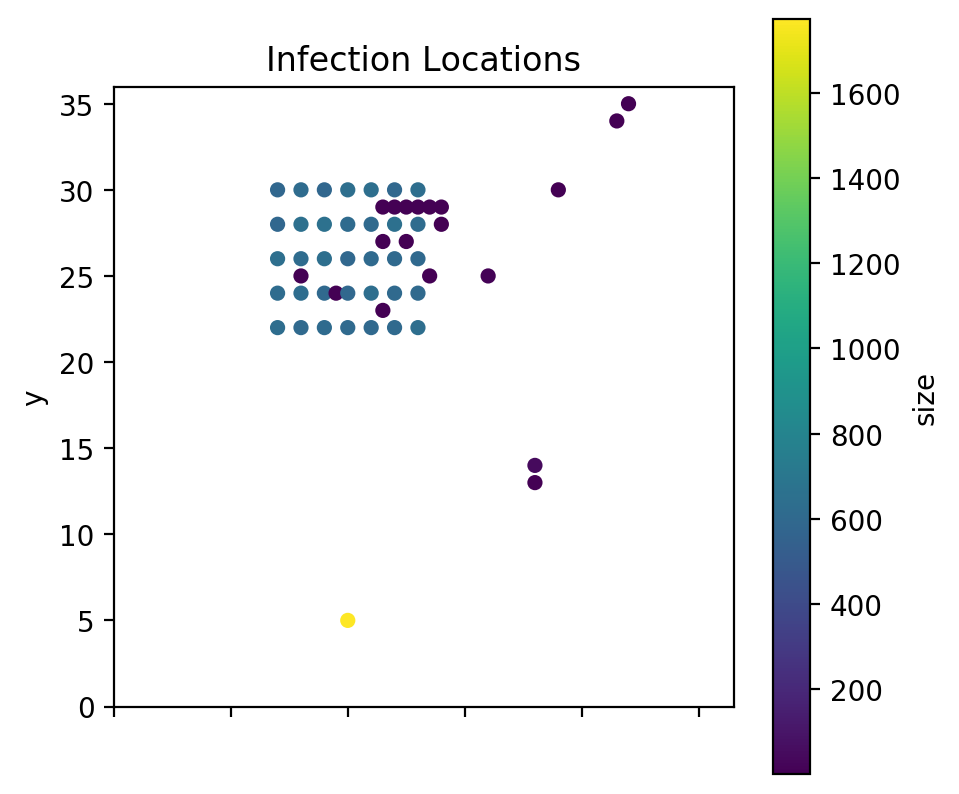

In [38]:
df = pd.concat([agents.patients, agents.staff])
oc = df[['infect_location.x', 'infect_location.y']]
oc = oc.rename(columns={'infect_location.x' : 'x', 'infect_location.y' : 'y'})
oc = oc[(oc['x'] != 0.0) | (oc['y'] != 0.0)]
oc = oc.groupby(['x', 'y'], as_index=False).size()
ax = oc.plot.scatter(x='x', y='y', c='size', colormap='viridis',
                     xlim=(0, hospital.dimensions[0]),
                     ylim=(0, hospital.dimensions[1]),
                     title='Infection Locations'
                     )
ax.set_aspect(hospital.dimensions[0] / hospital.dimensions[1])

In [39]:
dead = agents.patients[agents.patients.last_state ==  'MORGUE'].dropna(axis='columns')
dead['in_hospital'] = dead['exit_time'] - dead['entry_time']
dead['walking_time'] = dead['in_hospital'] - dead['sleep_time']
dead

,repast_id,type,entry_time,exit_time,last_state,process,infection_id,infection_model,infection_mode,infection_stage,infection_time,infected_by,infect_location.x,infect_location.y,incubation_end,diagnosis_type,sleep_time,survives,in_hospital,walking_time
0,100.0.1,patient,1 days 01:20:00,6 days 00:32:00,MORGUE,0,human.100.0.1,human,normal,incubating,6 days 00:28:00,bed.0.6,20.0,5.0,8 days 09:23:51,icu,4 days 16:48:00,False,4 days 23:12:00,0 days 06:24:00
1,308.0.1,patient,4 days 02:00:00,8 days 22:52:00,MORGUE,0,human.308.0.1,human,normal,incubating,8 days 22:49:00,bed.0.23,20.0,5.0,10 days 00:59:52,icu,4 days 16:48:00,False,4 days 20:52:00,0 days 04:04:00
2,241.0.1,patient,3 days 05:00:00,10 days 00:21:00,MORGUE,0,human.241.0.1,human,normal,incubating,10 days 00:18:00,bed.0.16,20.0,5.0,15 days 10:19:11,icu,6 days 16:48:00,False,6 days 19:21:00,0 days 02:33:00
3,458.0.1,patient,6 days 02:00:00,10 days 18:01:00,MORGUE,0,human.458.0.1,human,normal,incubating,10 days 17:59:00,bed.0.30,20.0,5.0,14 days 05:55:03,icu,4 days 09:36:00,False,4 days 16:01:00,0 days 06:25:00
4,509.0.1,patient,6 days 19:40:00,10 days 18:16:00,MORGUE,0,human.509.0.1,human,normal,incubating,10 days 18:13:00,bed.0.35,20.0,5.0,12 days 01:30:55,icu,3 days 16:48:00,False,3 days 22:36:00,0 days 05:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,23514.0.1,patient,351 days 05:09:00,359 days 08:17:00,MORGUE,0,human.23514.0.1,human,normal,incubating,359 days 08:16:00,bed.0.0,20.0,5.0,360 days 14:43:39,icu,8 days 00:00:00,False,8 days 03:08:00,0 days 03:08:00
471,23457.0.1,patient,350 days 04:30:00,359 days 11:57:00,MORGUE,0,human.23457.0.1,human,normal,incubating,359 days 11:46:00,bed.0.28,20.0,5.0,364 days 07:21:17,icu,9 days 04:48:00,False,9 days 07:27:00,0 days 02:39:00
472,23722.0.1,patient,354 days 05:00:00,360 days 20:14:00,MORGUE,0,human.23722.0.1,human,normal,incubating,360 days 20:12:00,bed.0.3,20.0,5.0,364 days 21:01:29,icu,6 days 12:00:00,False,6 days 15:14:00,0 days 03:14:00
473,22277.0.1,patient,332 days 11:45:00,362 days 16:29:00,MORGUE,0,human.22277.0.1,human,normal,incubating,362 days 16:21:00,bed.0.38,20.0,5.0,367 days 10:04:35,icu,29 days 16:48:00,False,30 days 04:44:00,0 days 11:56:00


In [40]:
agents.patients['last_state'].value_counts()

WAIT_IN_DOCTOR    22533
LEAVE_ICU          1255
MORGUE              475
WAIT_CHAIR_1         53
                     44
WAIT_CHAIR_2         42
NO_ATTENTION         16
WAIT_CHAIR_3          2
Name: last_state, dtype: int64

In [41]:
import postprocess as pp
df = pd.concat([agents.patients, agents.staff])

In [42]:
df = df[df['infected_by'] != '']
itime = df['incubation_end'] - df['infection_time']

In [43]:
itime.describe()

count                        23408
mean     3 days 07:09:41.981459330
std      1 days 13:36:10.217673081
min                0 days 14:00:13
25%         1 days 22:38:12.750000
50%         3 days 07:20:36.500000
75%         4 days 15:53:34.750000
max                5 days 23:58:27
dtype: object

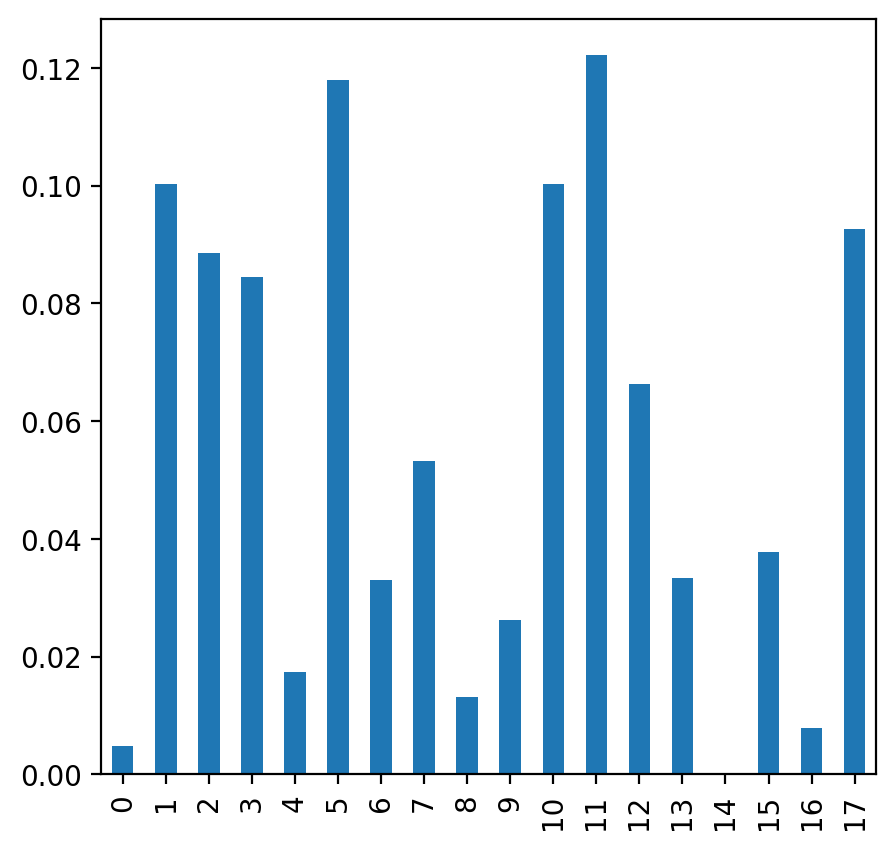

In [44]:
sleep_probs = [0.004748328, 0.100224175, 0.088623115, 0.084432757, 0.017333166, 0.117953925, 0.032968386, 0.053206605, 0.013086353, 0.026187069, 0.100335789, 0.122177398, 0.066380434, 0.033379033, 1.7555e-05, 0.037753818, 0.007899849, 0.092694777]
pd.Series(sleep_probs).plot(kind='bar')

In [45]:
df = agents.patients

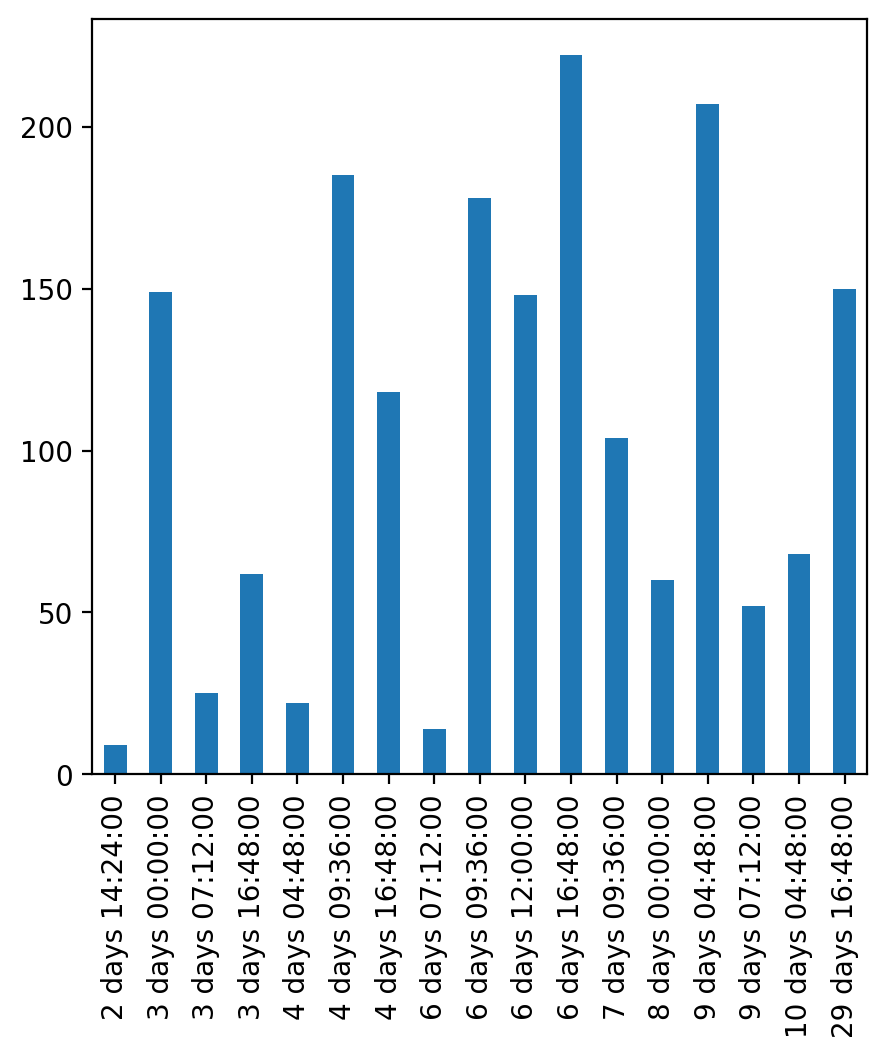

In [46]:
sleeps = df[~df['sleep_time'].isna()]['sleep_time'].value_counts().sort_index().plot(kind='bar')

Infected: 23407
Total: 24420


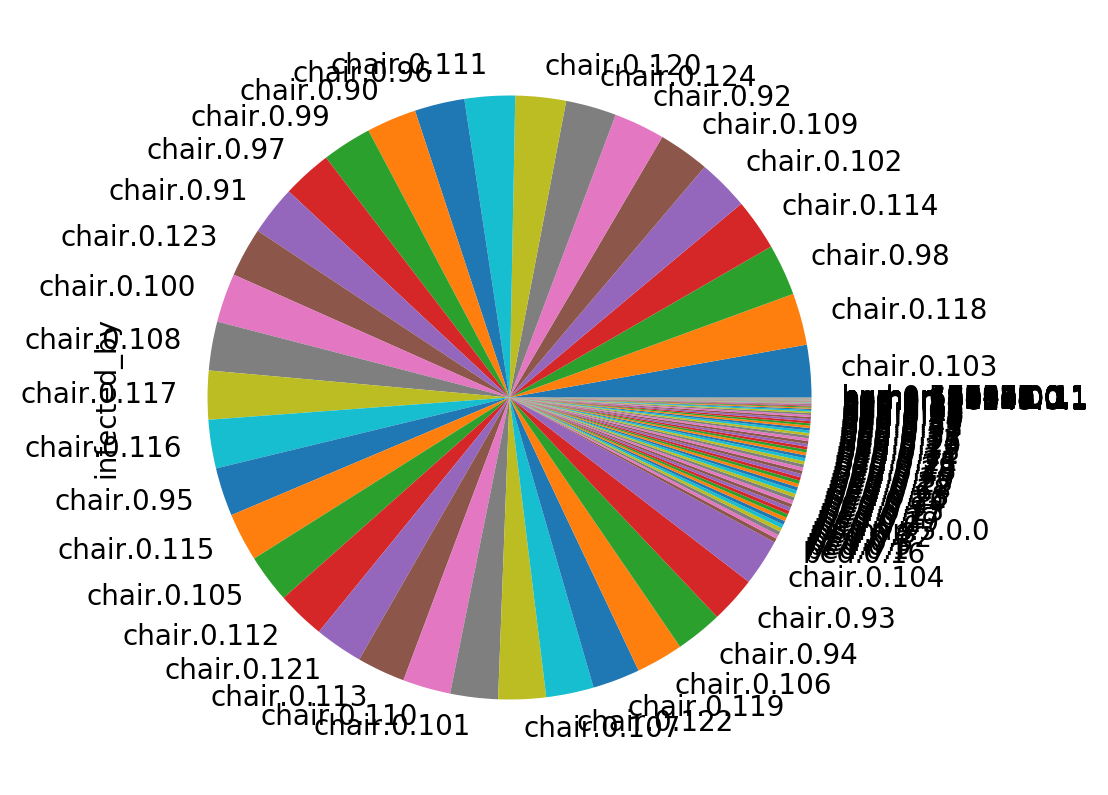

In [47]:
p = agents.patients
p.value_counts()
print(f"Infected: {p[p['infected_by'] != '']['infected_by'].count()}")
print(f"Total: {hospital.parameters['patient']['influx'].sum()}")
p[p['infected_by'] != '']['infected_by'].value_counts().plot.pie()